---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Gathering, Description and Pre-processing**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Model Preparation - RandomForestClassifier**](#Section6)</br>
7. [**Actionable Insights**](#Section7)</br>

---
<a name = Section1></a>
# **1. Introduction**
---


### WeConnect is a Telecom Service Provider ###


- The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- The objective is to use the model to take further actions for preventing customers to churn.
- They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.

### Current Scenario ###

- Till now they have been using traditional ways which now have become a problem to handle due to human interventions.
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.


---
<a name = Section2></a>
# **2. Problem Statement**
---


- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
- It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

## Project Deliverables ##
- Deliverable: Predict whether a customer will churn or not..
- Machine Learning Task: Classification
- Target Variable: Churn (Yes / No)

## Evaluation Metric ##
 - The model evaluation will be based on the Accuracy Score.


---
<a name = Section3></a>
# **3. Installing and importing Libraries**
---

In [217]:
#importing necessary libraries
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Gathering, Description and Pre-processing**
---

In [403]:
# Load the data
churnTrain = pd.read_csv(filepath_or_buffer='./churnTrain.csv')
churnTest = pd.read_csv(filepath_or_buffer='./churnTest.csv')

# Get the dimensions of data
print('Shape of the train dataset:',churnTrain.shape)
print('Shape of the test dataset:',churnTest.shape)

Shape of the train dataset: (5634, 21)
Shape of the test dataset: (1409, 20)


In [404]:
churnTrain.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [405]:
churnTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [406]:
churnTrain.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


In [407]:
churnTrain.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [408]:
churnTrain.skew()

SeniorCitizen     1.836455
tenure            0.243081
MonthlyCharges   -0.223487
dtype: float64

In [409]:
churnTrain.nunique()

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1494
TotalCharges        5291
Churn                  2
dtype: int64

In [410]:
churnTrain.drop("customerID", axis=1, inplace=True)

In [411]:
churnTrain.shape

(5634, 20)

In [412]:
print("Before dealing with blank values")
print(churnTrain[churnTrain['TotalCharges'] == ' '].index) 

Before dealing with blank values
Int64Index([899, 2224, 2697, 3054, 3488, 4056, 4761, 5607], dtype='int64')


In [413]:
churnTrain['TotalCharges']= churnTrain['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

In [414]:
churnTrain['Churn']= churnTrain['Churn'].apply(lambda x: 0 if x=="No" else 1).astype(float)

In [415]:
churnTrain['SeniorCitizen']= churnTrain['SeniorCitizen'].astype(float)
churnTrain['tenure']= churnTrain['tenure'].astype(float)

In [416]:
numerical= churnTrain.drop(['Churn'], axis=1).select_dtypes('number').columns

categorical = churnTrain.select_dtypes('object').columns

In [417]:
print("Numerical: ",numerical)
print("Categorical ",categorical)

Numerical:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [68]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# churnTrain['ChurnEncoded'] = le.fit_transform(churnTrain['Churn'])

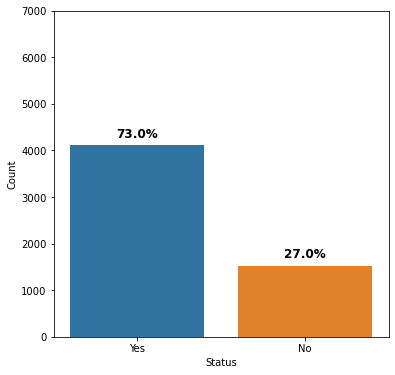

In [418]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Churn', data=churnTrain, ax=ax)

for index, value in enumerate(churnTrain['Churn'].value_counts()):
    label = '{}%'.format(round((value / churnTrain['Churn'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                fontweight='bold',
                size=12)

ax.set_xticklabels(['Yes', 'No'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_ylim([0, 7000]);

In [419]:
churnTrain[numerical].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,12.0,19.70,258.35
1,0.0,42.0,73.90,3160.55
2,0.0,71.0,65.15,4681.75
3,0.0,71.0,85.45,6300.85
4,0.0,30.0,70.40,2044.75


In [420]:
churnTrain[categorical].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1,Female,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic)
2,Male,Yes,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic)
3,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check
4,Male,No,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check


In [421]:
churnTrain["MultipleLines"]= churnTrain["MultipleLines"].replace("No phone service", "No")

In [422]:
churnTrain[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]] =churnTrain[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].replace("No internet service", "No")

In [423]:
churnTrain[categorical].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [424]:
churnTrain['TotalCharges'].isnull().value_counts()

False    5626
True        8
Name: TotalCharges, dtype: int64

In [425]:
churnTrain['TotalCharges'].fillna(churnTrain['TotalCharges'].mean(),inplace=True)

In [277]:
churnTrain['TotalCharges'].isnull().value_counts()

False    5634
Name: TotalCharges, dtype: int64

In [430]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(churnTrain, categorical)



In [431]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,12.0,19.70,258.35,0.0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.0,42.0,73.90,3160.55,1.0,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0
2,0.0,71.0,65.15,4681.75,0.0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0
3,0.0,71.0,85.45,6300.85,0.0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0
4,0.0,30.0,70.40,2044.75,0.0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0


In [435]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df[numerical].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439475,-0.825884,-1.497530,-0.893017
1,-0.439475,0.395961,0.302996,0.388543
2,-0.439475,1.577078,0.012320,1.060278
3,-0.439475,1.577078,0.686687,1.775244
4,-0.439475,-0.092777,0.186726,-0.104175


In [432]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [280]:
y_train.value_counts(normalize=True)*100

0.0    73.286
1.0    26.714
Name: Churn, dtype: float64

In [281]:
y_test.value_counts(normalize=True)*100

0.0    71.872227
1.0    28.127773
Name: Churn, dtype: float64

In [471]:
X_train.shape

(4507, 23)

In [472]:
y_train.shape

(4507,)

## Model Preparation and prediction

In [490]:
#using Logistic Regression as Baseline Model

logReg = LogisticRegression(random_state=123)

logReg.fit(X_train,y_train)

predsLogReg = logReg.predict(X_test)

In [515]:
print(confusion_matrix(y_test,predsLogReg))

[[725  85]
 [152 165]]


In [491]:
print(classification_report(y_test,predsLogReg))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       810
         1.0       0.66      0.52      0.58       317

    accuracy                           0.79      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.78      0.79      0.78      1127



In [496]:
transformer = ColumnTransformer([
    ("OHE", OneHotEncoder(drop="if_binary"), categorical),
    ("scaler", StandardScaler(), numerical)
], remainder="passthrough")

In [509]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
                 ("classifier", LogisticRegression(random_state=123))])


penalty = ["l1", "l2"]
l1_ratio = np.linspace(0, 1, 20)
C = [0.001 ,0.01, 0.1, 1, 10, 100, 1000]

param_grid = {"classifier__penalty" : penalty,
             "classifier__l1_ratio" : l1_ratio,
             "classifier__C" : C}

# kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
LR_grid = GridSearchCV(pipe, param_grid=param_grid, scoring="recall", verbose=1)

LR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(random_state=123))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'classifier__penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [510]:
print('Best Parameters of GridSearchCV for LR Model:', 'blue', LR_grid.best_params_)
print("--------------------------------------------------------------------------------------------------------------------")
print('Best Estimator of GridSearchCV for LR Model:', LR_grid.best_estimator_)

Best Parameters of GridSearchCV for LR Model: blue {'classifier__C': 1000, 'classifier__l1_ratio': 0.0, 'classifier__penalty': 'l2'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for LR Model: Pipeline(steps=[('classifier',
                 LogisticRegression(C=1000, l1_ratio=0.0, random_state=123))])


In [512]:
from sklearn.metrics import confusion_matrix

In [513]:
predsLogRegGrid = LR_grid.predict(X_test)

log_grid_f1 = f1_score(y_test, predsLogRegGrid)
log_grid_acc = accuracy_score(y_test, predsLogRegGrid)

print(confusion_matrix(y_test, predsLogRegGrid))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, predsLogRegGrid))
print("\033[1m--------------------------------------------------------\033[0m")

[[723  87]
 [150 167]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       810
         1.0       0.66      0.53      0.58       317

    accuracy                           0.79      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.78      0.79      0.78      1127

--------------------------------------------------------


In [494]:
#using Logistic Regression as Baseline Model

rfc = RandomForestClassifier(random_state=123)

rfc.fit(X_train,y_train)

predsRFC = rfc.predict(X_test)

In [495]:
print(classification_report(y_test,predsRFC))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       810
         1.0       0.64      0.44      0.52       317

    accuracy                           0.77      1127
   macro avg       0.72      0.67      0.69      1127
weighted avg       0.76      0.77      0.76      1127



In [441]:
logReg = LogisticRegression()

logReg.fit(X_train,y_train)

logPreds = logReg.predict(X_test)

In [447]:
print(accuracy_score(y_test,logPreds))

0.7897071872227152


In [450]:
print(classification_report(y_test,logPreds))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       810
         1.0       0.66      0.52      0.58       317

    accuracy                           0.79      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.78      0.79      0.78      1127



In [293]:
# from sklearn.pipeline import make_pipeline
# from sklearn.pipeline import Pipeline

# from sklearn.compose import make_column_transformer
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import f1_score


In [290]:
# from sklearn.compose import ColumnTransformer

# transformer = ColumnTransformer([
#     ("OHE", OneHotEncoder(drop="if_binary"), categorical),
#     ("scaler", StandardScaler(), numerical)
# ], remainder="passthrough")

In [291]:
# transformer

In [267]:
# col_mask=churnTrain.isnull().any(axis=0)

In [268]:
# col_mask

In [269]:
# row_mask=churnTrain.isnull().any(axis=1)

In [271]:
# row_mask.value_counts()

False    5626
True        8
dtype: int64

In [487]:
# models = []

# models.append(("LR", LogisticRegression()))
# # models.append(("SVC", SVC()))
# # models.append(("KNN", KNeighborsClassifier()))
# models.append(("DT", DecisionTreeClassifier()))
# models.append(("RF", RandomForestClassifier()))
# # models.append(("ADA", AdaBoostClassifier()))
# # models.append(("GB", GradientBoostingClassifier()))
# # models.append(("XGB", XGBClassifier(eval_metric='mlogloss')))

# # evaluate each model in turn

# results = []
# names = []
# f1_scores = []
# # recall_scores = []
# # roc_auc_scores = []
# acc_scores = []

# for name, model in models:
#     pipe = Pipeline([("transformer", transformer),
#                      ("model", model)])
#     kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
#     cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

#     results.append(cv_results)
#     names.append(name)

#     y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
#     f1_scores.append(f1_score(y_test, y_pred))
#     # recall_scores.append(recall_score(y_test, y_pred))
#     # roc_auc_scores.append(roc_auc_score(y_test, y_pred))
#     acc_scores.append(accuracy_score(y_test, y_pred))    
    

# # result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
# # result_df.iplot(kind="box", boxpoints="all", title="CV Results")

# # compare = pd.DataFrame({"F1": f1_scores,
# #                         "Recall": recall_scores,
# #                         "ROC AUC": roc_auc_scores, 
# #                         "Accuracy": acc_scores 
# #                        }, index=names)

# # compare

# # for score in compare.columns:
# #     compare[score].sort_values().iplot(kind="barh", title=f"{score} Scores")

In [488]:

# classification=pd.DataFrame( {"F1": f1_scores,
#                          "Accuracy": acc_scores 
#                         }, index=names).sort_values(by="Accuracy",ascending=False)

# classification

## 6.5) Preprocessing the Test Data before prediction

In [455]:
churnTest.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [456]:
churnTest.drop("customerID", axis=1, inplace=True)

In [457]:
churnTest.shape

(1409, 19)

In [458]:
print("Before dealing with blank values")
print(churnTest[churnTest['TotalCharges'] == ' '].index) 

Before dealing with blank values
Int64Index([103, 592, 1327], dtype='int64')


In [459]:
churnTest['TotalCharges']= churnTest['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

In [460]:
churnTest['SeniorCitizen']= churnTest['SeniorCitizen'].astype(float)
churnTest['tenure']= churnTest['tenure'].astype(float)

In [461]:
numerical= churnTest.select_dtypes('number').columns

categorical = churnTest.select_dtypes('object').columns

In [462]:
print("Test Data, Numerical: ",numerical)
print("Test Data, Categorical: ",categorical)

Test Data, Numerical:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Test Data, Categorical:  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [463]:
churnTest["MultipleLines"]= churnTest["MultipleLines"].replace("No phone service", "No")

In [464]:
churnTest[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]] =churnTest[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].replace("No internet service", "No")

In [465]:
churnTest['TotalCharges'].isnull().value_counts()

False    1406
True        3
Name: TotalCharges, dtype: int64

In [466]:
churnTest['TotalCharges'].fillna(churnTest['TotalCharges'].mean(),inplace=True)

In [467]:
churnTest['TotalCharges'].isnull().value_counts()

False    1409
Name: TotalCharges, dtype: int64

In [468]:
dfTest = one_hot_encoder(churnTest,categorical)

In [469]:
dfTest.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,41.0,79.85,3320.75,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0
1,1.0,66.0,102.40,6471.85,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,1,0,0,0
2,0.0,12.0,45.00,524.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.0,5.0,50.60,249.95,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.0,10.0,65.90,660.05,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1


In [470]:
scaler = StandardScaler()
dfTest[numerical] = scaler.fit_transform(dfTest[numerical])

dfTest[numerical].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.441679,0.335987,0.504761,0.453208
1,2.264086,1.353363,1.255673,1.843912
2,-0.441679,-0.844170,-0.655741,-0.780952
3,-0.441679,-1.129035,-0.469262,-0.902056
4,-0.441679,-0.925560,0.040227,-0.721063


### 6.5.2) Predicting the target feature based on X_test

In [475]:
churnTest_X_test = dfTest

In [476]:
churnTest_X_test.shape

(1409, 23)

In [478]:
churnTestPreds = logReg.predict(churnTest_X_test)

In [479]:
output = pd.DataFrame({'CustomerID': churnTest['customerID'], 'Churn': churnTestPreds})
output.to_csv('submission.csv', index=False, header=False)

## Storing the result of predicted variable in output file

In [ ]:
output = pd.DataFrame({'REF Number': custTest.REF_NO, 'Revenue Grid': y_pred})
output.to_csv('submission.csv', index=False, header=False)

---
<a name = Section7></a>
# **7. Actionable Insights**
---

### Insights for High net worth Individuals

- Incentivise customers who are in the age group of 36-40 followed by 45-50 and 41-45.
- Offer discount schemes for Professionals 
- Offer discounts targeted to Female customers.
- Offer discounts to Retired customers to encourage them to invest in trading
- Offer discounts to TOP 3 regions viz. South East, North West and Northern Ireland respectively.